# Débug

In [2]:
!pip install -U -q segmentation-models
!pip install -q tensorflow==2.2.1
!pip install -q keras==2.5
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm

ERROR: Could not find a version that satisfies the requirement tensorflow==2.2.1 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0)
ERROR: No matching distribution found for tensorflow==2.2.1
ERROR: Could not find a version that satisfies the requirement keras==2.5 (from versions: 0.2.0, 0.3.0, 0.3.1, 0.3.2, 0.3.3, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.0.6, 1.0.7, 1.0.8, 1.1.0, 1.1.1, 1.1.2, 1.2.0, 1.2.1, 1.2.2, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.0.5, 2.0.6, 2.0.7, 2.0.8, 2.0.9, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.1.5, 2.1.6, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.2.4, 2.2.5, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.5.0rc0, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0rc3, 2.6.0, 2.7.0rc0, 2.7.0rc2, 2.7.0, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.10.0rc0, 2.10.0rc1, 2.10.0, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0rc3, 2.11.0, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.13.1rc0, 2.13.1

# Prétraitement

## Redimension

In [7]:
import os
from PIL import Image

# Dossiers de base
base_folders = {
    "left": "/Users/kevinroualec/Desktop/imgp8/leftImg8bit/train",
    "gt": "/Users/kevinroualec/Desktop/imgp8/gtFine/train"
}

# Création des dossiers de sortie "resized" pour chaque dossier train
output_folders = {key: os.path.join(folder, "resized") for key, folder in base_folders.items()}
for folder in output_folders.values():
    os.makedirs(folder, exist_ok=True)

# Vérification si c'est une image gtFine
def is_gtfine_image(filename):
    return filename.lower().endswith('gtfine_labelids.png')

# Stocker les images groupées par leur préfixe
grouped_images = {}

# Exploration des dossiers
for key, folder in base_folders.items():
    for city in os.listdir(folder):
        city_path = os.path.join(folder, city)
        if not os.path.isdir(city_path):
            continue

        for image_file in os.listdir(city_path):
            if key == "gt" and not is_gtfine_image(image_file):
                continue
            if key == "left" and not image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue

            prefix = "_".join(image_file.split('_')[:3])
            grouped_images.setdefault(prefix, {"left": None, "gt": None})
            image_path = os.path.join(city_path, image_file)

            if key == "left":
                grouped_images[prefix]["left"] = image_path
            else:
                grouped_images[prefix]["gt"] = image_path

# Traitement et sauvegarde
for prefix, images in grouped_images.items():
    left_path, gt_path = images["left"], images["gt"]

    if left_path and gt_path:
        try:
            left_image = Image.open(left_path).resize((1024, 512))
            save_path = os.path.join(output_folders["left"], f"{prefix}_leftImg8bit.png")
            left_image.save(save_path)
            #print(f"Image gauche {prefix} redimensionnée et sauvegardée.")
        except Exception as e:
            print(f"Erreur avec l'image gauche {prefix}: {e}")

        try:
            gt_image = Image.open(gt_path).resize((1024, 512), Image.NEAREST)
            save_path = os.path.join(output_folders["gt"], f"{prefix}_gtFine_labelIds.png")
            gt_image.save(save_path)
            #print(f"Image gtFine {prefix} redimensionnée et sauvegardée.")
        except Exception as e:
            print(f"Erreur avec l'image gtFine {prefix}: {e}")
    else:
        print(f"Paire incomplète pour le préfixe {prefix}. Redimensionnement ignoré.")

print("Redimensionnement terminé avec succès.")


Redimensionnement terminé avec succès.


# Baseline

EfficientNetB0 with FPN optimized model compiled successfully with CategoricalCELoss.
Toutes les paires image/mask correspondent.
Les paires image/mask d'entraînement sont correctement appariées.
Toutes les paires image/mask correspondent.
Les paires image/mask de validation sont correctement appariées.
Number of training images: 2975
Number of training masks: 2975
Number of validation images: 500
Number of validation masks: 500
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 22s/step - accuracy: 0.5859 - f1-score: 0.2891 - iou_score: 0.2079 - loss: 0.1505 
Epoch 1: iou_score improved from -inf to 0.36186, saving model to eff_fpn_model_best_iou_f.keras
371/371 ━━━━━━━━━━━━━━━━━━━━ 8606s 23s/step - accuracy: 0.5863 - f1-score: 0.2895 - iou_score: 0.2084 - loss: 0.1503 - val_accuracy: 0.4664 - val_f1-score: 0.1926 - val_iou_score: 0.1194 - val_loss: 0.2746 - learning_rate: 1.0000e-04
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 22s/step - accuracy: 0.8702 - f1-score: 0.6122 - iou_score: 0.571

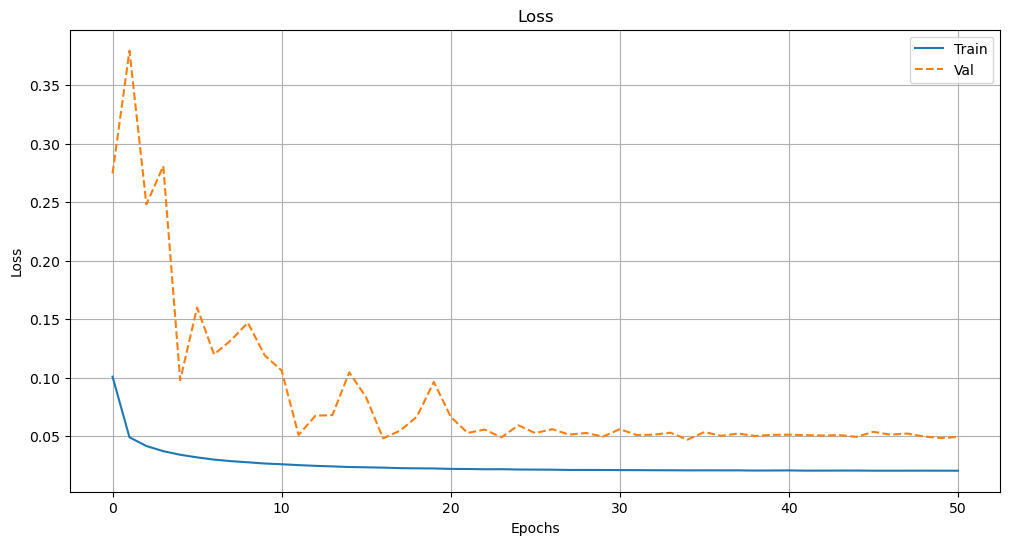

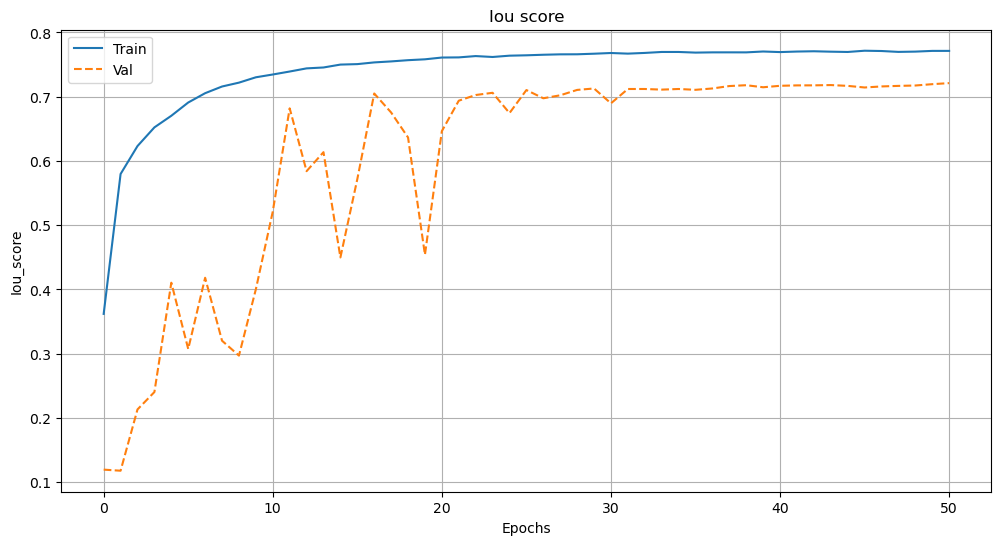

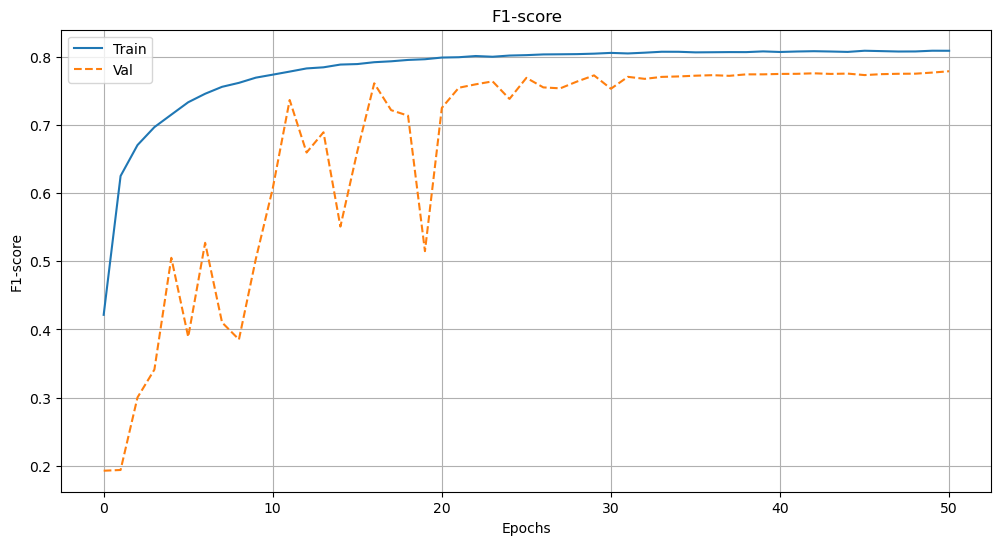

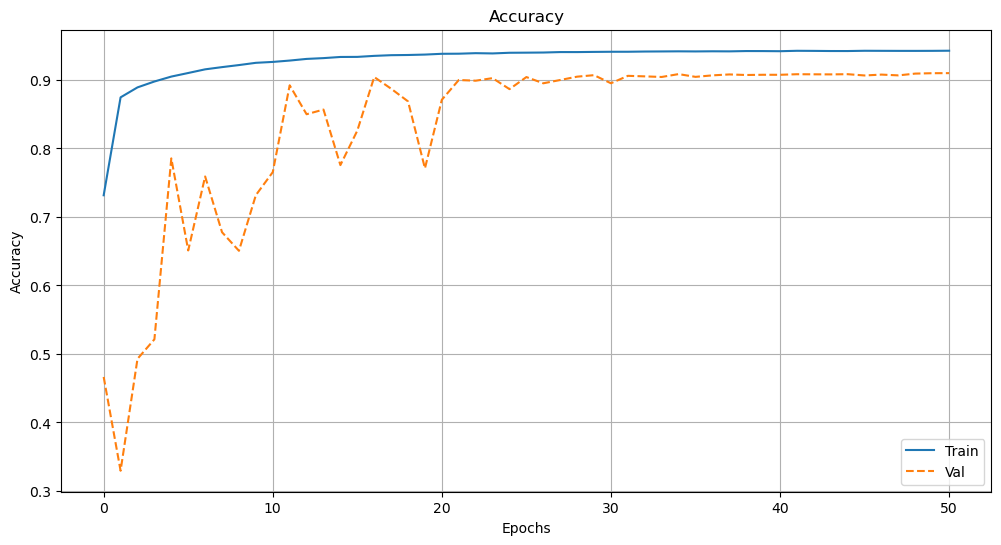

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step


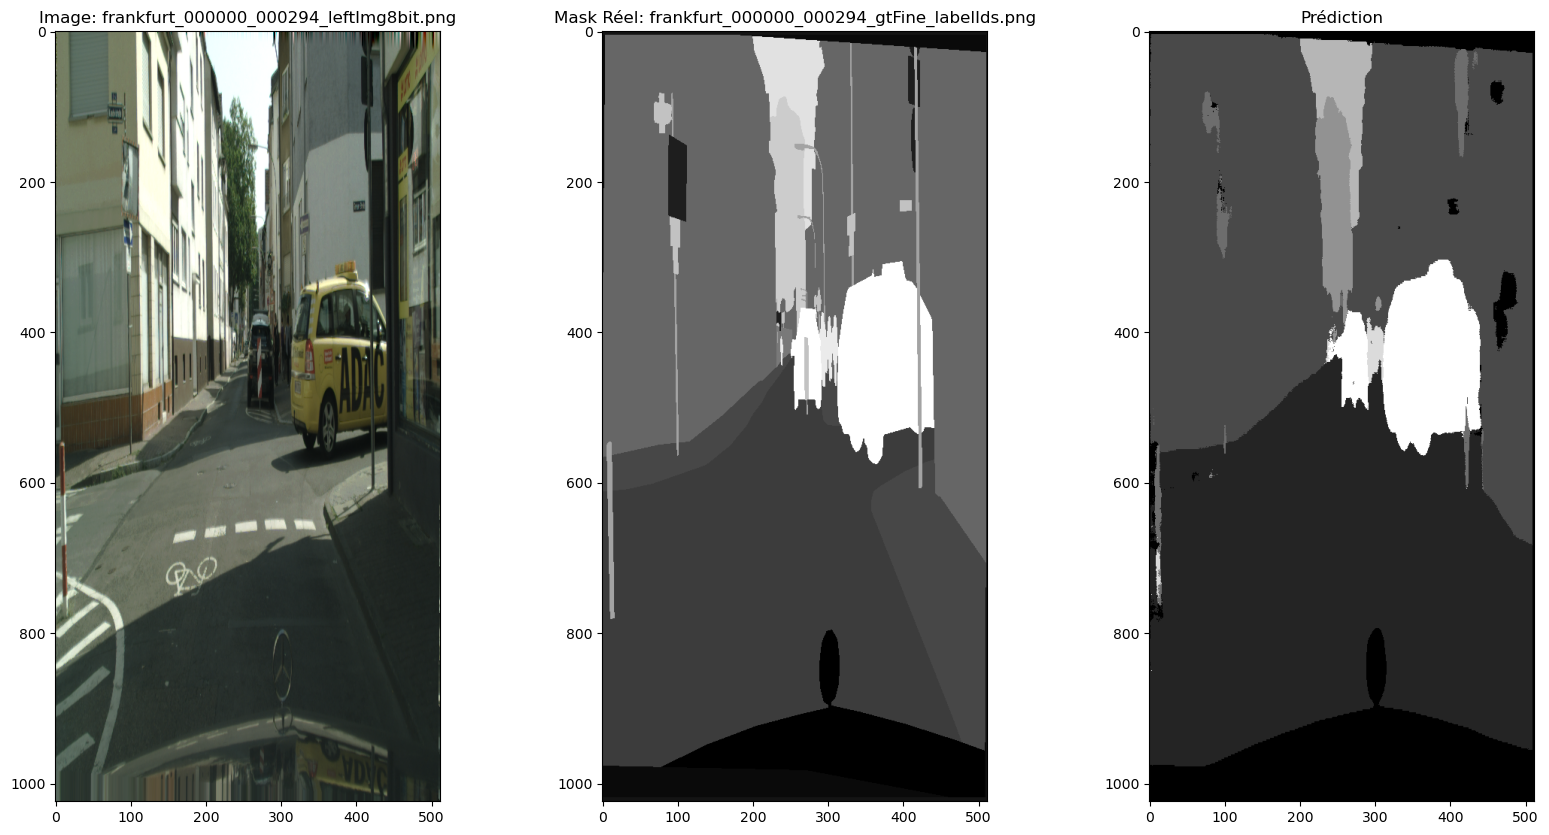

In [48]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from collections import namedtuple
import segmentation_models as sm
from albumentations import Compose, HorizontalFlip, VerticalFlip, RandomBrightnessContrast, RandomGamma, ShiftScaleRotate, PadIfNeeded, RandomCrop
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.utils import to_categorical
import cv2

# Assurer la compatibilité avec tensorflow.keras
os.environ["SM_FRAMEWORK"] = "tf.keras"

# Définition de la structure Label
Label = namedtuple('Label', ['name', 'id', 'trainId', 'category', 'categoryId', 'hasInstances', 'ignoreInEval', 'color'])

# Liste complète des labels
labels = [
    Label('unlabeled', 0, 255, 'void', 0, False, True, (0, 0, 0)),
    Label('ego vehicle', 1, 255, 'void', 0, False, True, (0, 0, 0)),
    Label('rectification border', 2, 255, 'void', 0, False, True, (0, 0, 0)),
    Label('out of roi', 3, 255, 'void', 0, False, True, (0, 0, 0)),
    Label('static', 4, 255, 'void', 0, False, True, (0, 0, 0)),
    Label('dynamic', 5, 255, 'void', 0, False, True, (111, 74, 0)),
    Label('ground', 6, 255, 'void', 0, False, True, (81, 0, 81)),
    Label('road', 7, 0, 'flat', 1, False, False, (128, 64, 128)),
    Label('sidewalk', 8, 1, 'flat', 1, False, False, (244, 35, 232)),
    Label('parking', 9, 255, 'flat', 1, False, True, (250, 170, 160)),
    Label('rail track', 10, 255, 'flat', 1, False, True, (230, 150, 140)),
    Label('building', 11, 2, 'construction', 2, False, False, (70, 70, 70)),
    Label('wall', 12, 3, 'construction', 2, False, False, (102, 102, 156)),
    Label('fence', 13, 4, 'construction', 2, False, False, (190, 153, 153)),
    Label('guard rail', 14, 255, 'construction', 2, False, True, (180, 165, 180)),
    Label('bridge', 15, 255, 'construction', 2, False, True, (150, 100, 100)),
    Label('tunnel', 16, 255, 'construction', 2, False, True, (150, 120, 90)),
    Label('pole', 17, 5, 'object', 3, False, False, (153, 153, 153)),
    Label('polegroup', 18, 255, 'object', 3, False, True, (153, 153, 153)),
    Label('traffic light', 19, 6, 'object', 3, False, False, (250, 170, 30)),
    Label('traffic sign', 20, 7, 'object', 3, False, False, (220, 220, 0)),
    Label('vegetation', 21, 8, 'nature', 4, False, False, (107, 142, 35)),
    Label('terrain', 22, 9, 'nature', 4, False, False, (152, 251, 152)),
    Label('sky', 23, 10, 'sky', 5, False, False, (70, 130, 180)),
    Label('person', 24, 11, 'human', 6, True, False, (220, 20, 60)),
    Label('rider', 25, 12, 'human', 6, True, False, (255, 0, 0)),
    Label('car', 26, 13, 'vehicle', 7, True, False, (0, 0, 142)),
    Label('truck', 27, 14, 'vehicle', 7, True, False, (0, 0, 70)),
    Label('bus', 28, 15, 'vehicle', 7, True, False, (0, 60, 100)),
    Label('caravan', 29, 255, 'vehicle', 7, True, True, (0, 0, 90)),
    Label('trailer', 30, 255, 'vehicle', 7, True, True, (0, 0, 110)),
    Label('train', 31, 16, 'vehicle', 7, True, False, (0, 80, 100)),
    Label('motorcycle', 32, 17, 'vehicle', 7, True, False, (0, 0, 230)),
    Label('bicycle', 33, 18, 'vehicle', 7, True, False, (119, 11, 32)),
    Label('license plate', -1, -1, 'vehicle', 7, False, True, (0, 0, 142)),
]

# Dictionnaire pour regrouper les catId à des noms de catégories simplifiées
category_mapping = {
    0: 'void', 1: 'flat', 2: 'construction', 3: 'object', 4: 'nature', 5: 'sky', 6: 'human', 7: 'vehicle',
}

# Fonction pour mapper les catId aux catégories simplifiées
def map_category(label):
    new_category = category_mapping.get(label.categoryId, 'unknown')
    return Label(
        name=label.name, id=label.id, trainId=label.trainId, category=new_category,
        categoryId=label.categoryId, hasInstances=label.hasInstances, ignoreInEval=label.ignoreInEval, color=label.color
    )

# Application de la fonction avec une compréhension de liste
grouped_labels = [map_category(label) for label in labels]

# Chemins des images redimensionnées pour l'entraînement et la validation
train_images_dir_left = "/Users/kevinroualec/Desktop/imgp8/leftImg8bit/train/resized"
train_images_dir_gtfine = "/Users/kevinroualec/Desktop/imgp8/gtFine/train/resized"
val_images_dir_left = "/Users/kevinroualec/Desktop/imgp8/leftImg8bit/val"
val_images_dir_gtfine = "/Users/kevinroualec/Desktop/imgp8/gtFine/val"

def get_image_paths(directory, suffix="_leftImg8bit.png"):
    return [os.path.join(root, file) for root, _, files in os.walk(directory) for file in files if file.endswith(suffix)]

def verify_image_mask_pairs(image_paths, mask_paths):
    if len(image_paths) != len(mask_paths):
        print("Erreur : Le nombre d'images et de masques ne correspond pas.")
        return False

    for image_path, mask_path in zip(image_paths, mask_paths):
        image_name = os.path.basename(image_path)
        mask_name = os.path.basename(mask_path)
        if image_name.split('_leftImg8bit.png')[0] != mask_name.split('_gtFine_labelIds.png')[0]:
            print(f"Erreur : L'image {image_name} ne correspond pas au masque {mask_name}.")
            return False

    print("Toutes les paires image/mask correspondent.")
    return True

def load_and_preprocess(path, target_size=(1024, 512), color_mode="rgb"):
    try:
        img = keras.preprocessing.image.load_img(path, target_size=target_size, color_mode=color_mode)
        img = keras.preprocessing.image.img_to_array(img)
        img = img / 255.0 if color_mode == "rgb" else img.astype(np.float32)
        return img
    except Exception as e:
        print(f"Warning: {path} is corrupted or cannot be loaded. Skipping this file.")
        return None

def apply_category_mapping(mask):
    new_mask = np.zeros_like(mask, dtype=np.uint8)
    for label in labels:
        new_mask[mask == label.id] = label.categoryId
    return new_mask.astype(np.uint8)

def visualize_sample(image, mask, image_path, mask_path):
    import matplotlib.pyplot as plt
    fig, axs = plt.subplots(1, 2, figsize=(15, 10))
    axs[0].imshow(image.astype('uint8'))
    axs[0].set_title(f'Image: {os.path.basename(image_path)}')
    axs[0].axis('off')
    axs[1].imshow(mask.squeeze(), cmap='gray')
    axs[1].set_title(f'Mask: {os.path.basename(mask_path)}')
    axs[1].axis('off')
    plt.show()

# Définir les transformations d'augmentation avec une probabilité globale de 0.75
transform = Compose([
    HorizontalFlip(p=0.5),
    VerticalFlip(p=0.3),
    RandomBrightnessContrast(brightness_limit=0.15, contrast_limit=0.15, p=0.5),
    RandomGamma(gamma_limit=(90, 110), p=0.3),
    ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=10, p=0.5),
    PadIfNeeded(min_height=1024, min_width=512, border_mode=cv2.BORDER_REFLECT_101, p=1.0),
    RandomCrop(height=1024, width=512, p=1.0)
], p=0.75)

def data_generator(image_paths, mask_paths, batch_size, visualize=False):
    index = 0
    first_batch = True

    if not image_paths or not mask_paths:
        print("Warning: No data available for generating batches.")
        return

    shuffle_indices = np.arange(len(image_paths))
    np.random.default_rng().shuffle(shuffle_indices)

    while True:
        batch_images = []
        batch_masks = []
        augmented_count = 0
        for _ in range(batch_size):
            if index >= len(image_paths):
                index = 0
                np.random.default_rng().shuffle(shuffle_indices)

            shuffled_idx = shuffle_indices[index]
            image_path = image_paths[shuffled_idx]
            mask_path = mask_paths[shuffled_idx]

            img = load_and_preprocess(image_path)
            mask = load_and_preprocess(mask_path, color_mode="grayscale")

            if img is None or mask is None:
                index += 1
                continue

            if img.shape[:2] != mask.shape[:2]:
                print(f"Warning: Image and mask dimensions do not match for {image_path}")
                index += 1
                continue

            mask = apply_category_mapping(mask)
            mask = to_categorical(mask, num_classes=8).astype(np.float32)

            if img.shape[:2] != (1024, 512) or mask.shape[:2] != (1024, 512):
                print(f"Warning: Image or mask dimensions are incorrect for {image_path}")
                index += 1
                continue

            batch_images.append(img)
            batch_masks.append(mask)

            if np.random.rand() < 0.75:
                augmented = transform(image=img.copy(), mask=mask.copy())
                img_augmented = augmented['image']
                mask_augmented = augmented['mask']

                batch_images.append(img_augmented)
                batch_masks.append(mask_augmented)
                augmented_count += 1

            index += 1

        if not batch_images or not batch_masks:
            print("Warning: Empty batch generated")
            continue

        if visualize and first_batch:
            for i in range(min(2, len(batch_images))):
                visualize_sample(batch_images[i], np.argmax(batch_masks[i], axis=-1), image_path, mask_path)
            first_batch = False

        #print(f"Augmented {augmented_count} out of {len(batch_images)} images in this batch.")

        yield np.array(batch_images), np.array(batch_masks)

def efficientnet_fpn_optimized(input_size=(1024, 512, 3), dropout_rate=0.3):
    base_model = EfficientNetB0(include_top=False, input_shape=input_size, weights='imagenet')

    # Déverrouillez certaines couches pour le fine-tuning
    for layer in base_model.layers[-12:]:
        layer.trainable = True

    c1 = base_model.get_layer('block2a_expand_activation').output
    c2 = base_model.get_layer('block3a_expand_activation').output
    c3 = base_model.get_layer('block4a_expand_activation').output
    c4 = base_model.get_layer('block6a_expand_activation').output
    c5 = base_model.get_layer('top_activation').output

    p5 = layers.Conv2D(256, (1, 1), padding='same', activation='relu')(c5)
    p4 = layers.Conv2D(256, (1, 1), padding='same', activation='relu')(c4) + layers.UpSampling2D()(p5)
    p3 = layers.Conv2D(256, (1, 1), padding='same', activation='relu')(c3) + layers.UpSampling2D()(p4)
    p2 = layers.Conv2D(256, (1, 1), padding='same', activation='relu')(c2) + layers.UpSampling2D()(p3)

    u6 = layers.Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='same')(p5)
    u6 = layers.concatenate([u6, c4], axis=-1)
    c6 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Dropout(dropout_rate)(c6)
    c6 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3], axis=-1)
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Dropout(dropout_rate)(c7)
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2], axis=-1)
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Dropout(dropout_rate)(c8)
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1], axis=-1)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Dropout(dropout_rate)(c9)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    u10 = layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same')(c9)
    outputs = layers.Conv2D(8, (1, 1), activation='softmax', dtype='float32')(u10)

    model = models.Model(inputs=base_model.input, outputs=outputs)
    return model

# Initialisation des métriques de segmentation
iou_metric = sm.metrics.IOUScore(threshold=0.5)
dice_metric = sm.metrics.FScore(beta=1)
accuracy_metric = 'accuracy'

# Initialisation du modèle optimisé
model_optimized = efficientnet_fpn_optimized()

# Compilation du modèle avec les métriques de segmentation et la perte CategoricalCELoss
model_optimized.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-2),
    loss=sm.losses.CategoricalCELoss(),
    metrics=[iou_metric, dice_metric, accuracy_metric]
)

print("EfficientNetB0 with FPN optimized model compiled successfully with CategoricalCELoss.")

# Paramètres d'entraînement
batch_size = 16
epochs = 100

# Récupération des images et masques pour l'entraînement et la validation
train_images_paths = get_image_paths(train_images_dir_left)
train_mask_paths = get_image_paths(train_images_dir_gtfine, suffix="_gtFine_labelIds.png")

val_images_paths = get_image_paths(val_images_dir_left)
val_mask_paths = get_image_paths(val_images_dir_gtfine, suffix="_gtFine_labelIds.png")

# Triez les chemins pour vous assurer qu'ils sont dans le même ordre
train_images_paths.sort()
train_mask_paths.sort()
val_images_paths.sort()
val_mask_paths.sort()

# Vérification des paires image/mask
if verify_image_mask_pairs(train_images_paths, train_mask_paths):
    print("Les paires image/mask d'entraînement sont correctement appariées.")
else:
    print("Il y a des incohérences dans les paires image/mask d'entraînement.")

if verify_image_mask_pairs(val_images_paths, val_mask_paths):
    print("Les paires image/mask de validation sont correctement appariées.")
else:
    print("Il y a des incohérences dans les paires image/mask de validation.")

# Vérification des chemins d'images et de masques
print(f"Number of training images: {len(train_images_paths)}")
print(f"Number of training masks: {len(train_mask_paths)}")
print(f"Number of validation images: {len(val_images_paths)}")
print(f"Number of validation masks: {len(val_mask_paths)}")

# Générateurs de données pour l'entraînement et la validation
train_gen = data_generator(train_images_paths, train_mask_paths, batch_size)
val_gen = data_generator(val_images_paths, val_mask_paths, batch_size)

# Callbacks
callbacks = [
    ModelCheckpoint('eff_fpn_model_best_iou_f.keras', monitor='iou_score', save_best_only=True, mode='max', verbose=1),
    ReduceLROnPlateau(monitor='iou_score', factor=0.25, patience=2, verbose=1),
    EarlyStopping(monitor='iou_score', patience=5, verbose=1, mode='max'),  # Ajout du mode ici
    keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * (0.9 ** epoch))
]

# Entraînement du modèle
history = model_optimized.fit(
    train_gen,
    steps_per_epoch=len(train_images_paths) // (batch_size // 2),
    validation_data=val_gen if len(val_images_paths) > 0 else None,
    validation_steps=len(val_images_paths) // (batch_size // 2) if len(val_images_paths) > 0 else None,
    epochs=epochs,
    callbacks=callbacks
)

# Visualisation des métriques
def plot_metrics(history):
    import matplotlib.pyplot as plt
    metrics = ['loss', 'iou_score', 'f1-score', 'accuracy']
    for metric in metrics:
        plt.figure(figsize=(12, 6))
        plt.plot(history.history[metric], label='Train')
        if 'val_' + metric in history.history:
            plt.plot(history.history['val_' + metric], label='Val', linestyle='--')
        plt.title(metric.replace('_', ' ').capitalize())
        plt.xlabel("Epochs")
        plt.ylabel(metric.capitalize())
        plt.legend()
        plt.grid()
        plt.show()

plot_metrics(history)

def visualize_prediction(image_path, mask_path, model):
    assert os.path.exists(image_path), f"Erreur : {image_path} n'existe pas !"
    assert os.path.exists(mask_path), f"Erreur : {mask_path} n'existe pas !"

    image = load_and_preprocess(image_path)
    mask = load_and_preprocess(mask_path, color_mode="grayscale")

    prediction = model.predict(np.expand_dims(image, axis=0))[0]
    predicted_mask = np.argmax(prediction, axis=-1)

    import matplotlib.pyplot as plt
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 3, 1)
    plt.title(f"Image: {os.path.basename(image_path)}")
    plt.imshow(image)
    plt.subplot(1, 3, 2)
    plt.title(f"Mask Réel: {os.path.basename(mask_path)}")
    plt.imshow(mask, cmap='gray')
    plt.subplot(1, 3, 3)
    plt.title("Prédiction")
    plt.imshow(predicted_mask, cmap='gray')
    plt.show()

# Définition des chemins
image_path = "/Users/kevinroualec/Desktop/imgp8/leftImg8bit/val/frankfurt/frankfurt_000000_000294_leftImg8bit.png"
mask_path = "/Users/kevinroualec/Desktop/imgp8/gtFine/val/frankfurt/frankfurt_000000_000294_gtFine_labelIds.png"

# Exécution de la visualisation
visualize_prediction(image_path, mask_path, model_optimized)
